In [25]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import pandas as pd # Importing the pandas library
import numpy as np# Importing the numpy library
import matplotlib.pyplot as plt# Importing the matplotlib library
from sklearn.model_selection import train_test_split# Importing the train_test_split function
from sklearn.preprocessing import StandardScaler# Importing the StandardScaler function
from sklearn.linear_model import SGDClassifier# Importing the SGDClassifier function
from sklearn.metrics import accuracy_score# Importing the accuracy_score function
from mlxtend.plotting import plot_decision_regions# Importing the plot_decision_regions function
# Load the dataset using forward slashes
file_path = 'C:/Users/deeks/Downloads/data_banknote_authentication.txt'# Load the dataset
dataset = pd.read_csv(file_path)# Display the first five rows of the dataset


Model Accuracy: 0.98


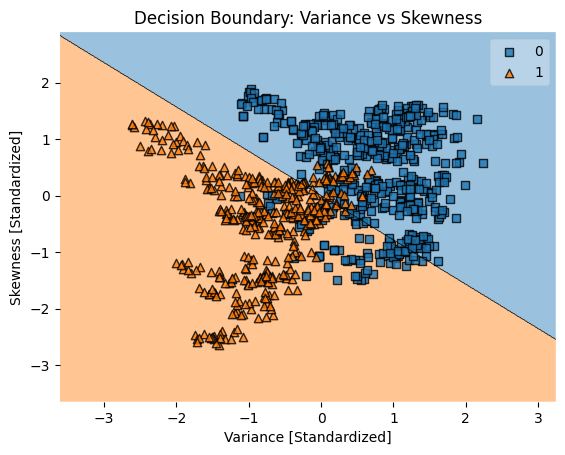

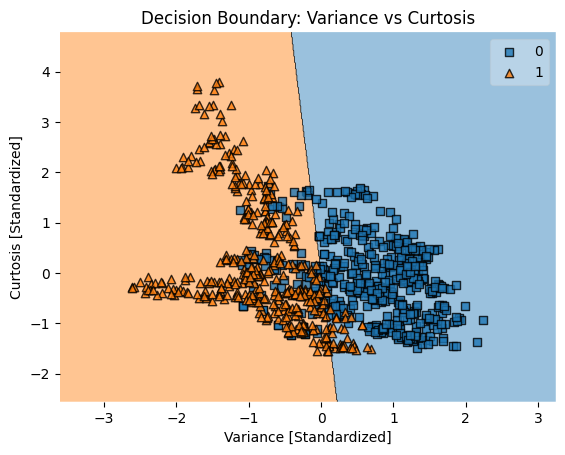

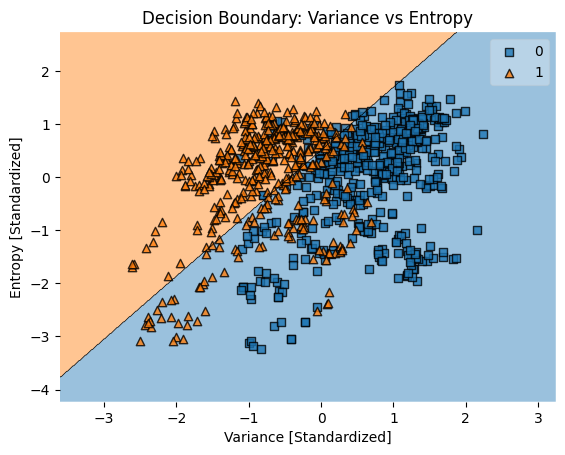

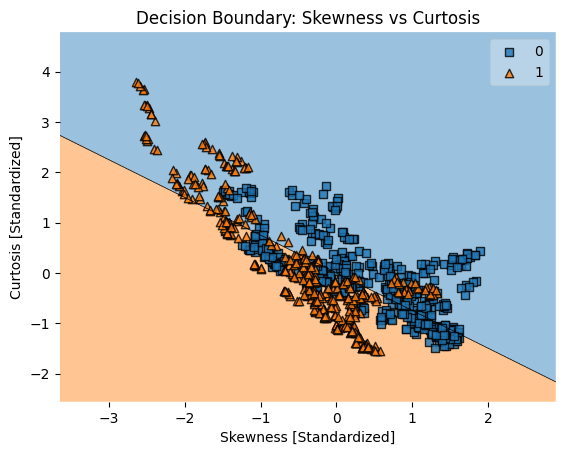

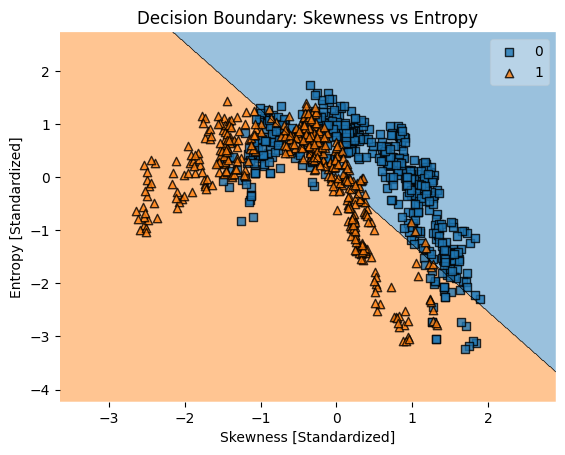

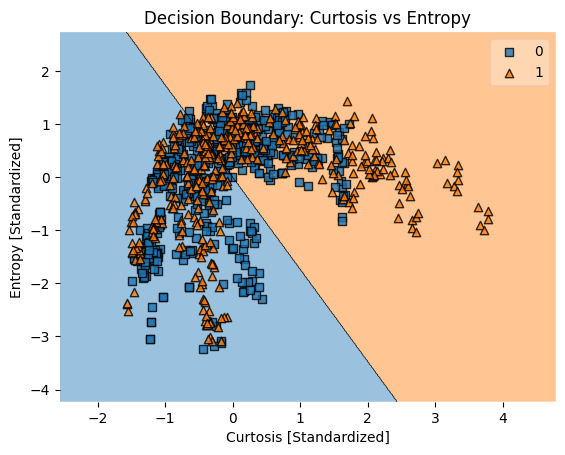

Accuracies for Feature Pairs:
Accuracy for Variance & Skewness: 0.84
Accuracy for Variance & Curtosis: 0.86
Accuracy for Variance & Entropy: 0.81
Accuracy for Skewness & Curtosis: 0.59
Accuracy for Skewness & Entropy: 0.74
Accuracy for Curtosis & Entropy: 0.49


In [21]:
# Display the first five rows of the dataset
dataset.columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']
X = dataset[['Variance', 'Skewness', 'Curtosis', 'Entropy']].values # Features
y = dataset['Class'].values# Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)# Split the dataset into training and testing sets
scaler = StandardScaler()# Standardize the features
X_train_scaled = scaler.fit_transform(X_train)# Standardize the training set
X_test_scaled = scaler.transform(X_test)# Standardize the testing set
model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)# Create a Perceptron model
model.fit(X_train_scaled, y_train)# Train the model
accuracy = accuracy_score(y_test, model.predict(X_test_scaled))# Calculate the accuracy of the model
print(f'Model Accuracy: {accuracy:.2f}')# Display the accuracy of the model
feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]# Define feature pairs
for pair in feature_pairs:# Iterate over each feature pair
    X_vis = X_train_scaled[:, pair]# Select the feature pair
    vis_model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)# Create a Perceptron model
    vis_model.fit(X_vis, y_train)# Train the model
    plt.figure()# Create a new figure
    plot_decision_regions(X_vis, y_train, clf=vis_model)# Plot the decision boundary
    plt.xlabel(dataset.columns[pair[0]] + ' [Standardized]')# Set the x-axis label
    plt.ylabel(dataset.columns[pair[1]] + ' [Standardized]')# Set the y-axis label
    plt.title(f'Decision Boundary: {dataset.columns[pair[0]]} vs {dataset.columns[pair[1]]}')# Set the title
    plt.show()# Display the plot
print("Accuracies for Feature Pairs:")# Display the accuracies for each feature pair
for pair in feature_pairs:# Iterate over each feature pair
    acc = accuracy_score(y_test, model.fit(X_train_scaled[:, pair], y_train).predict(X_test_scaled[:, pair]))# Calculate the accuracy
    print(f'Accuracy for {dataset.columns[pair[0]]} & {dataset.columns[pair[1]]}: {acc:.2f}')# Display the accuracy


Model Accuracy: 0.99


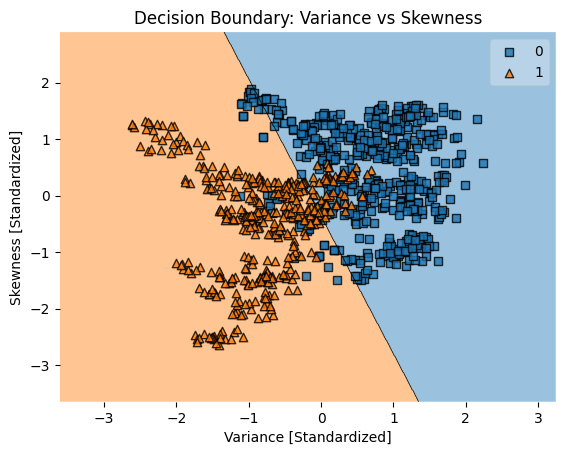

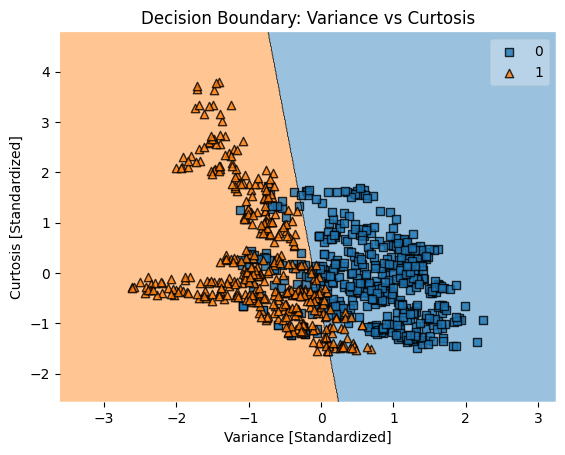

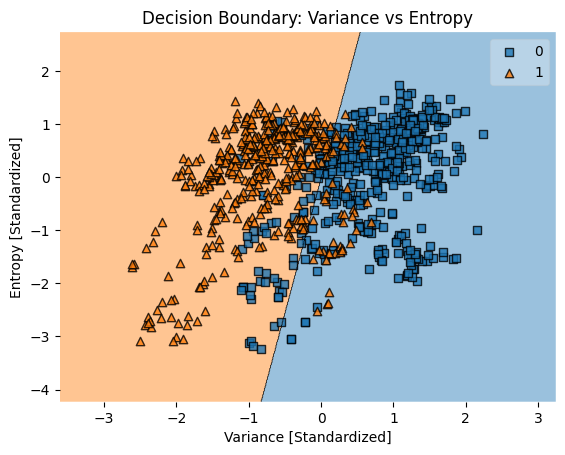

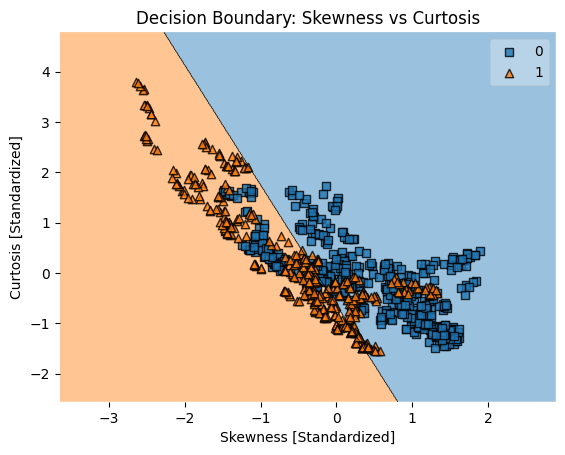

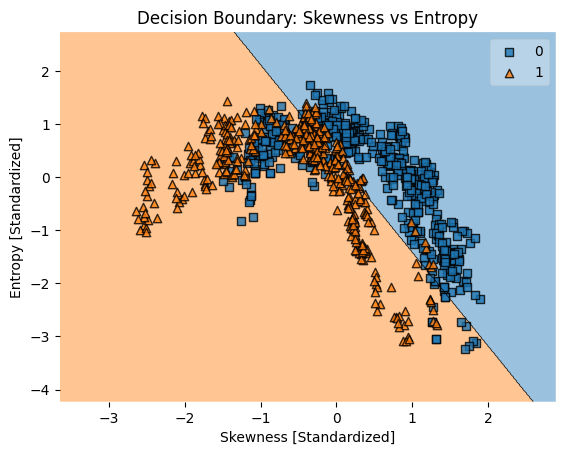

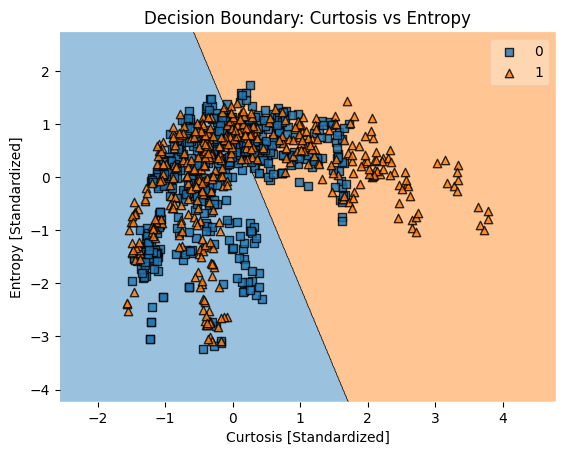

Accuracies for Feature Pairs:
Accuracy for Variance & Skewness: 0.88
Accuracy for Variance & Curtosis: 0.86
Accuracy for Variance & Entropy: 0.85
Accuracy for Skewness & Curtosis: 0.74
Accuracy for Skewness & Entropy: 0.79
Accuracy for Curtosis & Entropy: 0.54


In [22]:

dataset.columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']
features = dataset[['Variance', 'Skewness', 'Curtosis', 'Entropy']].values
target = dataset['Class'].values
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
ada_classifier = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)
ada_classifier.fit(X_train_scaled, y_train)
predictions = ada_classifier.predict(X_test_scaled)
print(f'Model Accuracy: {accuracy_score(y_test, predictions):.2f}')
feature_combinations = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]  
for combo in feature_combinations:
    X_vis = X_train_scaled[:, list(combo)]  
    ada_vis_model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)
    ada_vis_model.fit(X_vis, y_train)
    plt.figure()
    plot_decision_regions(X_vis, y_train, clf=ada_vis_model)
    plt.xlabel(dataset.columns[combo[0]] + ' [Standardized]')
    plt.ylabel(dataset.columns[combo[1]] + ' [Standardized]')
    plt.title(f'Decision Boundary: {dataset.columns[combo[0]]} vs {dataset.columns[combo[1]]}')
    plt.show()
print("Accuracies for Feature Pairs:")
for combo in feature_combinations:
    X_train_pair = X_train_scaled[:, list(combo)]
    X_test_pair = X_test_scaled[:, list(combo)]
    ada_classifier.fit(X_train_pair, y_train)
    pair_predictions = ada_classifier.predict(X_test_pair)
    pair_accuracy = accuracy_score(y_test, pair_predictions)
    print(f'Accuracy for {dataset.columns[combo[0]]} & {dataset.columns[combo[1]]}: {pair_accuracy:.2f}')


Perceptron Model Accuracy: 0.98
Adaline Model Accuracy: 0.99


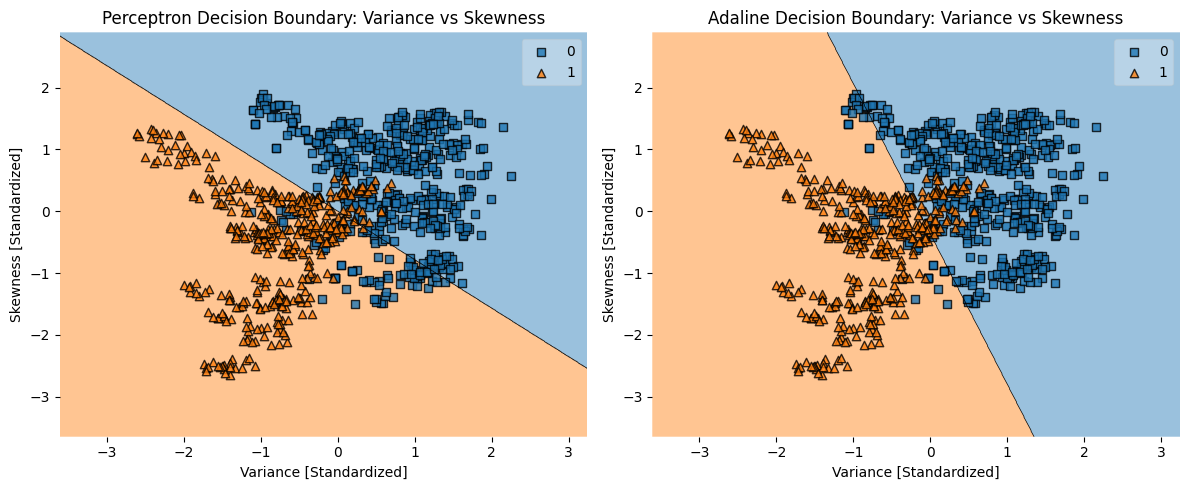

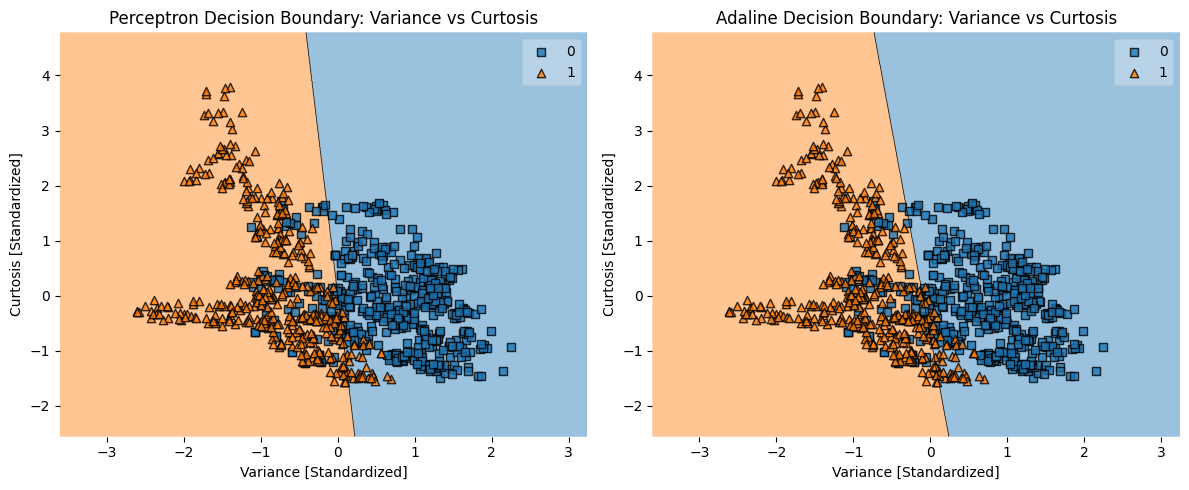

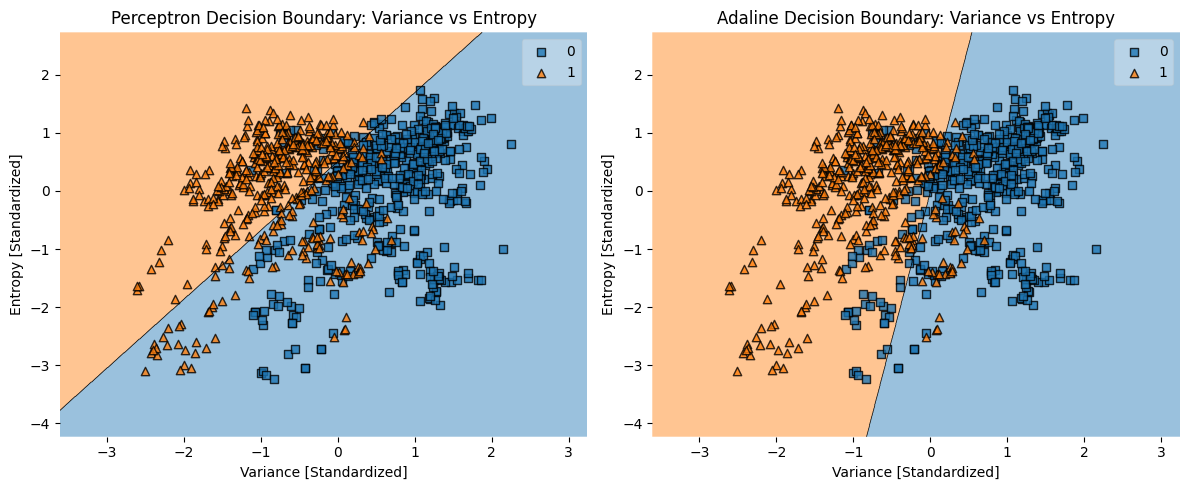

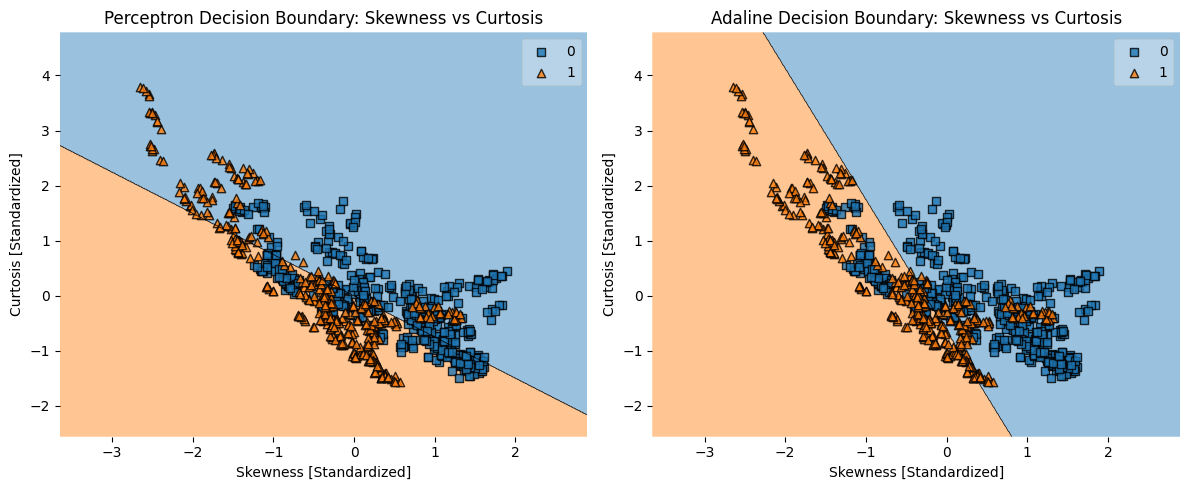

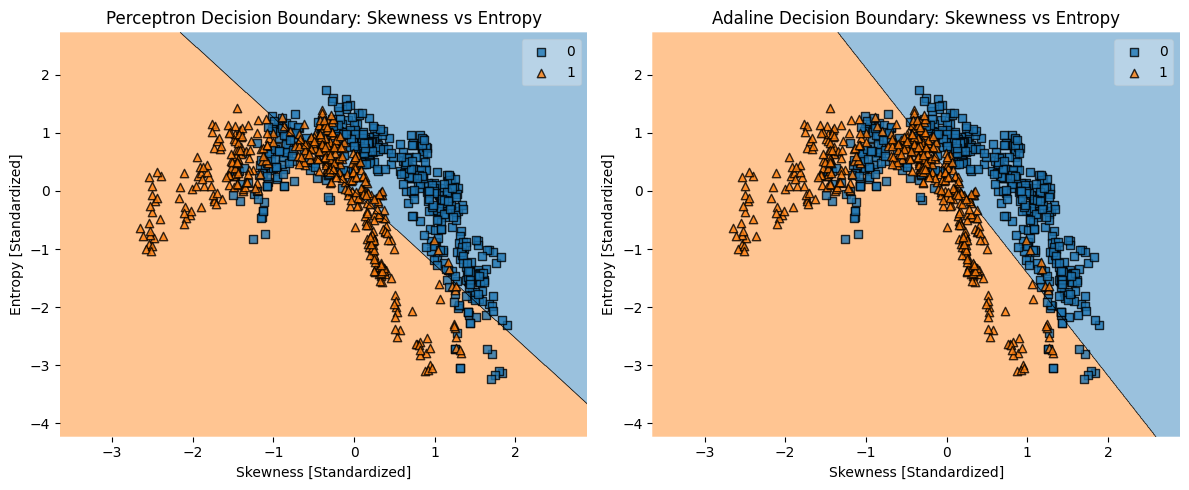

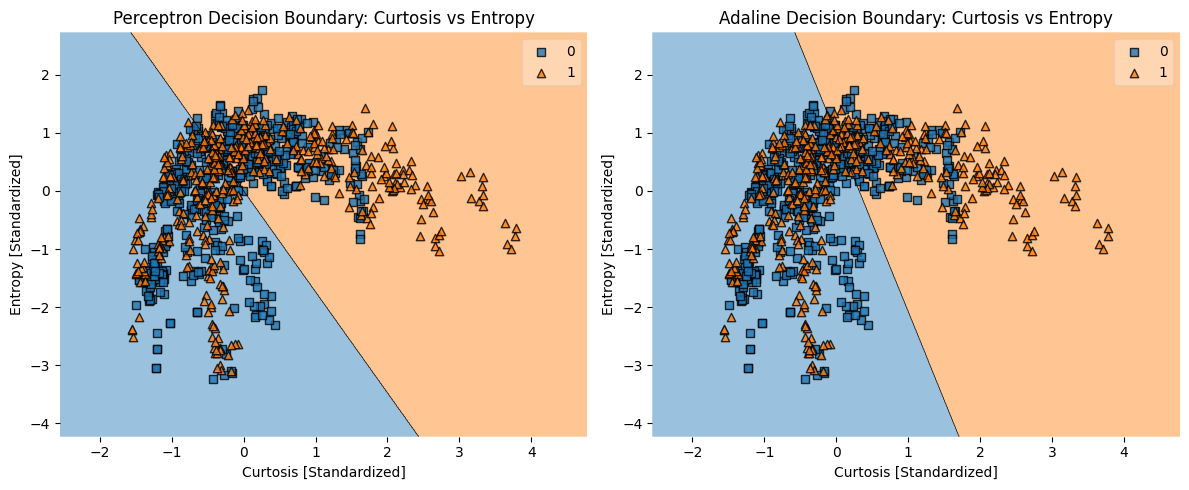

In [23]:

dataset.columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']# Rename the columns
features = dataset[['Variance', 'Skewness', 'Curtosis', 'Entropy']].values# Features
target = dataset['Class'].values# Target
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)# Split the dataset into training and testing sets
scaler = StandardScaler()# Standardize the features
X_train_scaled = scaler.fit_transform(X_train)# Standardize the training set
X_test_scaled = scaler.transform(X_test)# Standardize the testing set
perceptron_model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)# Create a Perceptron model
perceptron_model.fit(X_train_scaled, y_train)# Train the model
adaline_model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)# Create an Adaline model
adaline_model.fit(X_train_scaled, y_train)# Train the model
perceptron_predictions = perceptron_model.predict(X_test_scaled)# Make predictions using the Perceptron model
adaline_predictions = adaline_model.predict(X_test_scaled)# Make predictions using the Adaline model
perceptron_accuracy = accuracy_score(y_test, perceptron_predictions)# Calculate the accuracy of the Perceptron model
adaline_accuracy = accuracy_score(y_test, adaline_predictions)# Calculate the accuracy of the Adaline model
print(f'Perceptron Model Accuracy: {perceptron_accuracy:.2f}')# Display the accuracy of the Perceptron model
print(f'Adaline Model Accuracy: {adaline_accuracy:.2f}')# Display the accuracy of the Adaline model
feature_combinations = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)] # Define feature combinations
for combo in feature_combinations:# Iterate over each feature combination
    X_vis = X_train_scaled[:, list(combo)]# Select the feature combination
    
    plt.figure(figsize=(12, 5))# Create a new figure
    plt.subplot(1, 2, 1)# Create the first subplot
    perceptron_vis_model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)# Create a Perceptron model
    perceptron_vis_model.fit(X_vis, y_train)# Train the model
    plot_decision_regions(X_vis, y_train, clf=perceptron_vis_model)# Plot the decision boundary
    plt.title(f'Perceptron Decision Boundary: {dataset.columns[combo[0]]} vs {dataset.columns[combo[1]]}')
    plt.xlabel(dataset.columns[combo[0]] + ' [Standardized]')# Set the x-axis label
    plt.ylabel(dataset.columns[combo[1]] + ' [Standardized]')# Set the y-axis label
    plt.subplot(1, 2, 2)# Create the second subplot
    adaline_vis_model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)# Create an Adaline model
    adaline_vis_model.fit(X_vis, y_train)# Train the model
    plot_decision_regions(X_vis, y_train, clf=adaline_vis_model)# Plot the decision boundary
    plt.title(f'Adaline Decision Boundary: {dataset.columns[combo[0]]} vs {dataset.columns[combo[1]]}')
    plt.xlabel(dataset.columns[combo[0]] + ' [Standardized]')# Set the x-axis label
    plt.ylabel(dataset.columns[combo[1]] + ' [Standardized]')# Set the y-axis label
    plt.tight_layout()# Adjust the subplot layout
    plt.show()# Display the plot
